In [1]:
#!/usr/bin/env python3

import obspy as op
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import numpy as np

In [21]:
#Read in the raycount per cell
df = pd.read_csv('raycellcount_hs.dat', delim_whitespace=True)

data = np.array(df.Count)

#Turn the 1-D list into a 2-D array, and then manipulate it such that it matches the map.
data = np.reshape(data,(67,67))
data = np.swapaxes(data,0,1)
data = np.flip(data, axis=0)

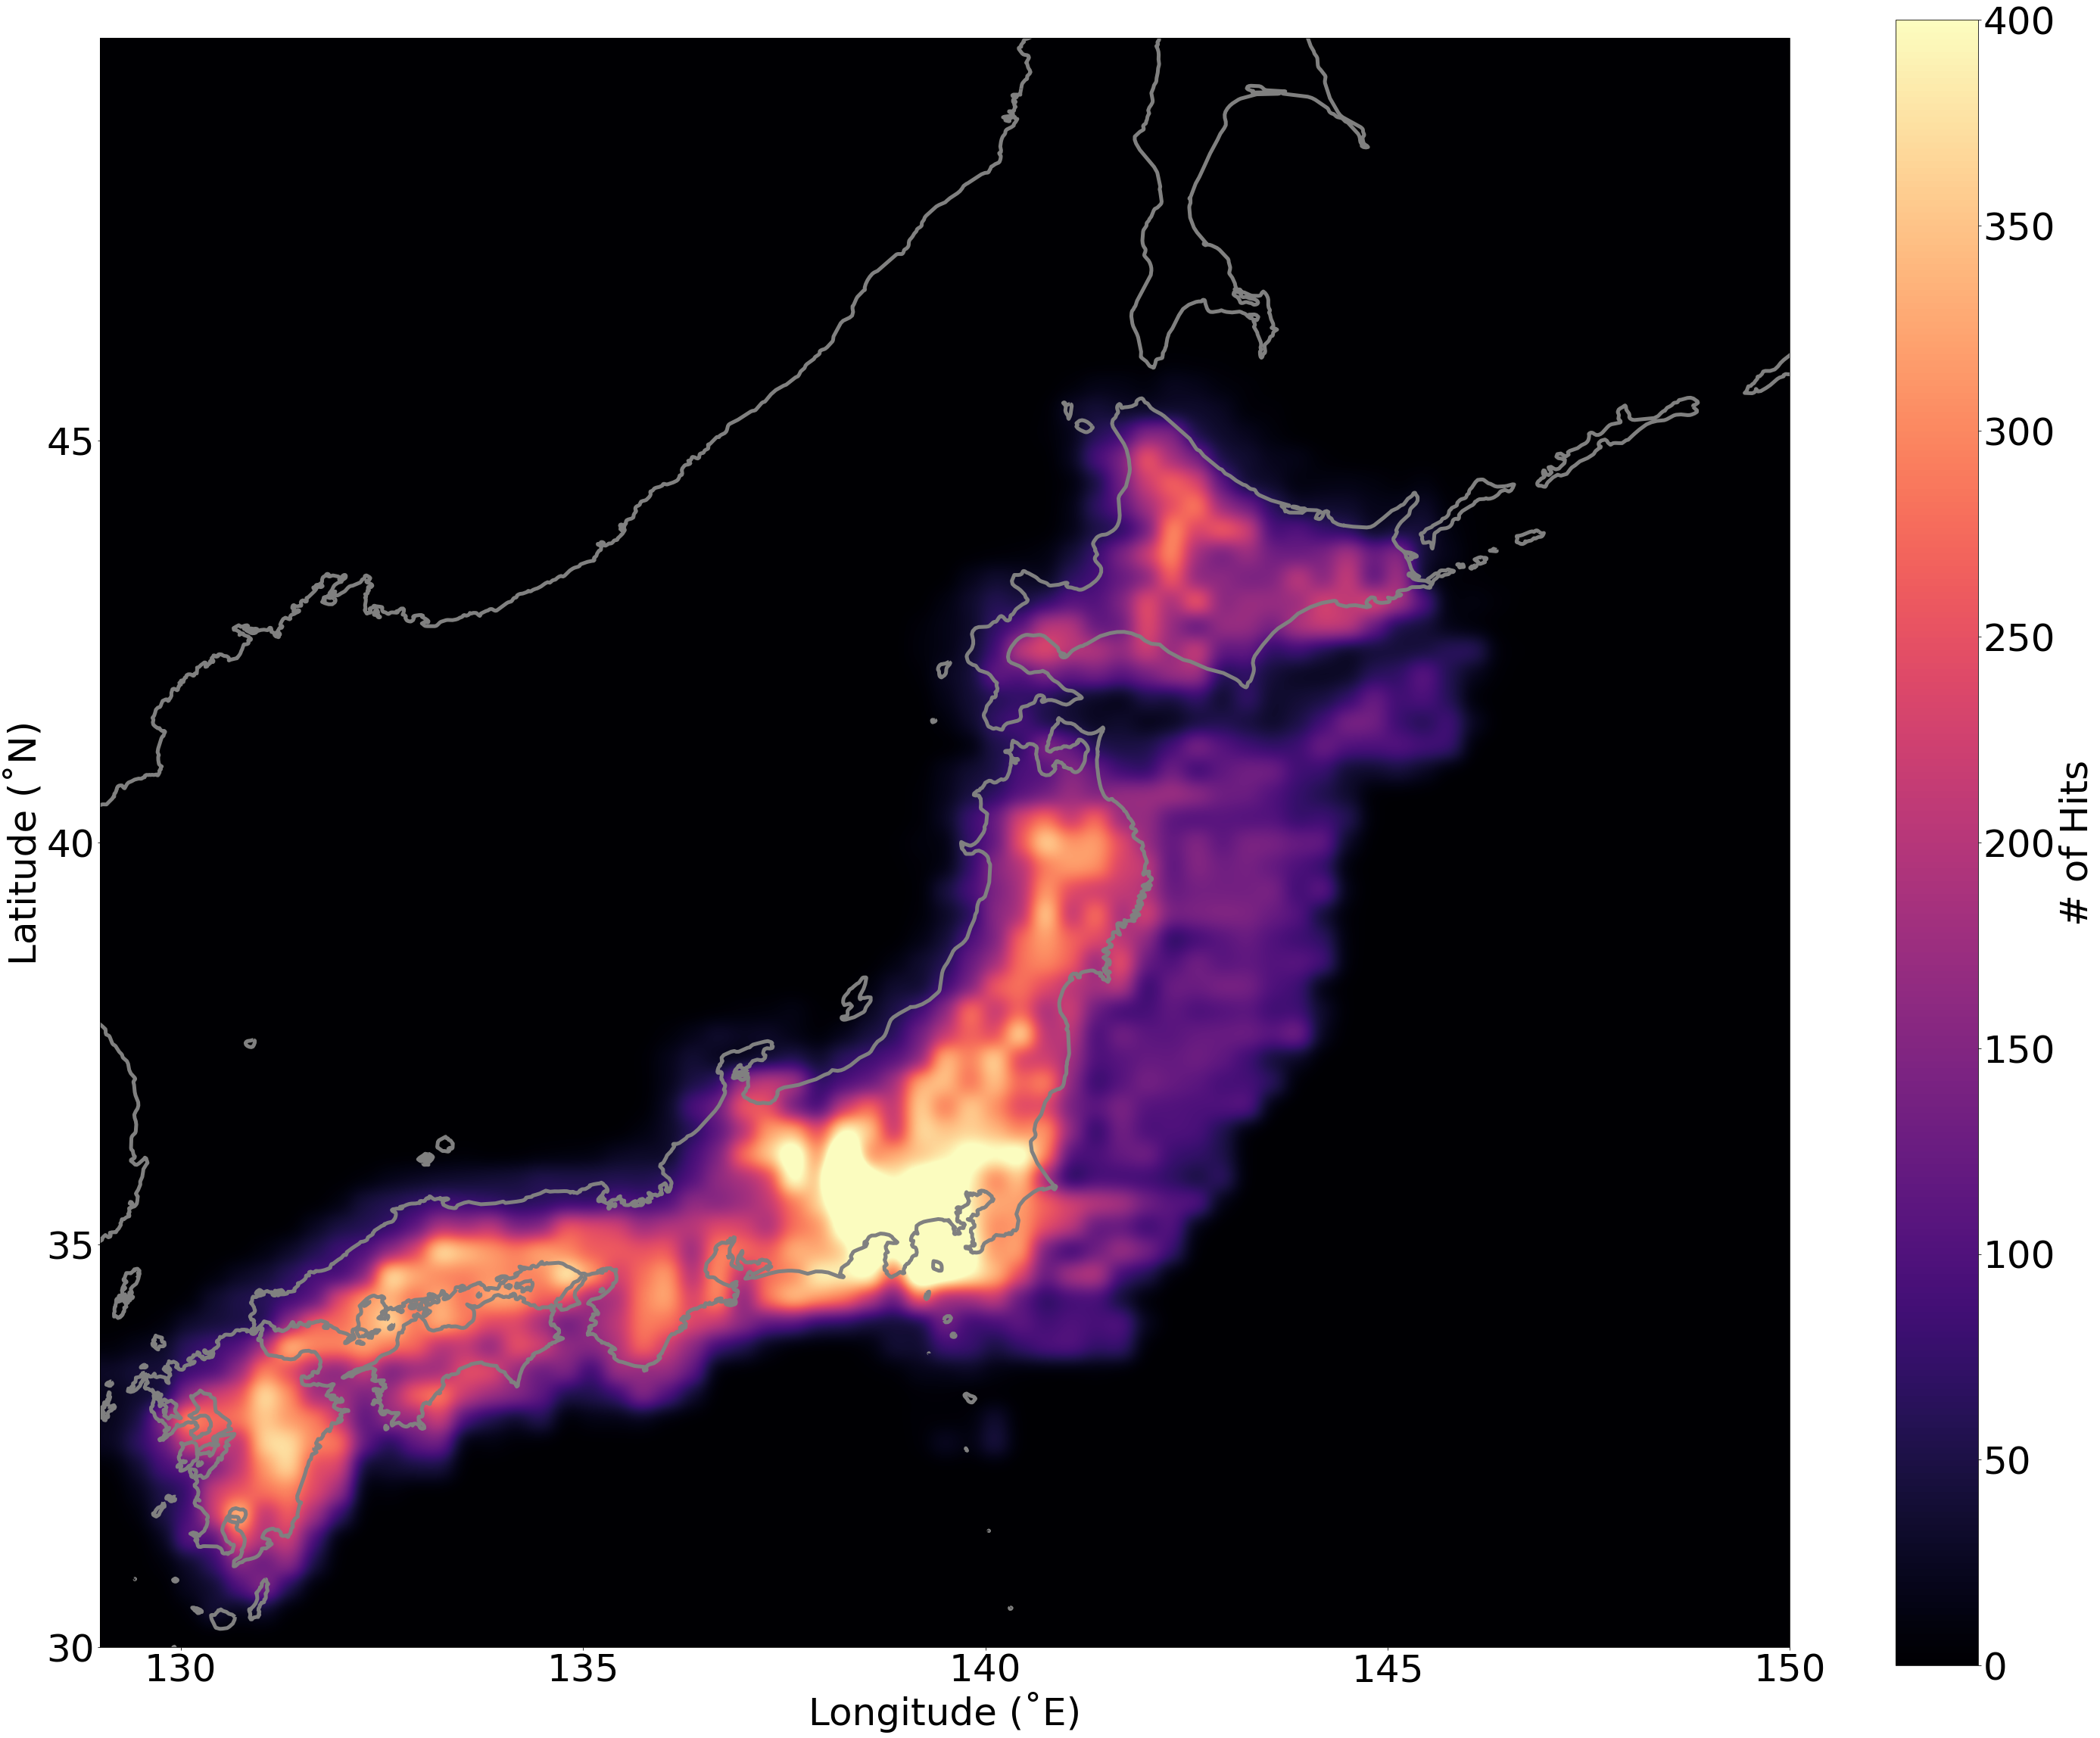

In [22]:
fig = plt.figure(figsize=(50,50))

projection=ccrs.PlateCarree()

#Plot the hitcount data as a colormesh.
ax = fig.add_subplot(1, 1, 1, projection=projection)
image = ax.imshow(data, cmap='magma', interpolation='gaussian', vmax=400, extent = [129,150,30,50], transform=projection)

#Add coastlines, and make the linewidth heavy so that you can see the outline well.
ax.coastlines(resolution='10m', color='gray',linewidth=5)

#X- and Y-axis labels
plt.xticks([130,135,140,145,150],fontsize=50)
plt.yticks([30,35,40,45],fontsize=50)
plt.xlabel('Longitude (˚E)', fontsize = 50)
plt.ylabel('Latitude (˚N)', fontsize = 50)

#Plot the colorbar associated with the Hits, and label.
cbar = plt.colorbar(image, shrink=0.8)
cbar.set_label('# of Hits', fontsize=50)
cbar.ax.tick_params(labelsize=50)

#Save the figure to a JPEG file, then show it below.
plt.savefig('hitcountvals_hinet_snet.jpg', type='JPEG')
plt.show()
